In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [63]:
with open('Data/cleaned_data.csv') as file:
    read_file = csv.reader(file)
    Data = list(line for line in read_file)
file.close()

In [64]:
Sample_Names = Data[0]
Site_Names = list(line[0] for line in Data[1:])
Beta_Matrix = list(list(map(float, line[1:])) for line in Data[1:])

In [72]:
beta_value= np.stack(Beta_Matrix)

In [1]:
%load_ext ipycache

/Users/Jun/anaconda/lib/python3.6/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated since IPython 4.0. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/Jun/anaconda/lib/python3.6/site-packages/ipycache.py:17: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils.traitlets import Unicode


In [3]:
%%cache matrix_cache.pkl sample_id site_id beta_values
sample_id = Sample_Names
site_id = Site_Names
beta_values = beta_value

[Skipped the cell's code and loaded variables beta_values, sample_id, site_id from file '/Users/Jun/Documents/Fall 2017/Capstone/matrix_cache.pkl'.]


In [5]:
with open('Data/bmi.csv') as file:
    read_file = csv.reader(file)
    bmi_l = list(line for line in read_file)
file.close()

with open('Data/age.csv') as file:
    read_file = csv.reader(file)
    age_l = list(line for line in read_file)
file.close()

with open('Data/smoking_status.csv') as file:
    read_file = csv.reader(file)
    ss_l = list(line for line in read_file)
file.close()

In [6]:
bmi = np.array(list(item[1] for item in bmi_l)[1:]).astype(float)
age = np.array(list(item[1] for item in age_l)[1:]).astype(float)
ss = np.array(list(item[1] for item in ss_l)[1:]).astype(float)

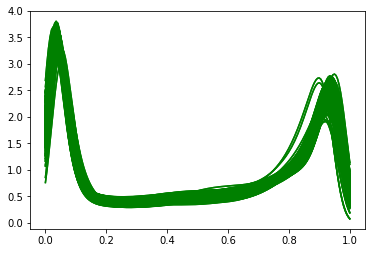

In [20]:
beta_range = np.linspace(0,1,200)
for i in range(beta_values.shape[1]):
    density = gaussian_kde(beta_values[:,i])
    #density.covariance_factor = lambda : .25
    #density._compute_covariance()
    plt.plot(beta_range, density(beta_range),'g')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

In [14]:
X = np.vstack([bmi, age, ss]).T
lr = LinearRegression()
lr.fit(X, beta_values[0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
lr.coef_

array([ -1.88774846e-05,  -4.57304309e-06,  -7.34546198e-04])